In [38]:
from qiskit import QuantumCircuit
from math import pi
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_state_city

In [58]:
def circuitWithPhaseError():
    qc = QuantumCircuit(3,1)

    #encoding
    qc.cnot(1,0)
    qc.cnot(1,2)
    qc.barrier()

    qc.h(0)
    qc.h(1)
    qc.h(2)
    qc.barrier()
    qc.rz(pi/3, 1) #phase error
    qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.h(2)

    #decoding
    qc.cnot(1,2)
    qc.cnot(1,0)

    return qc

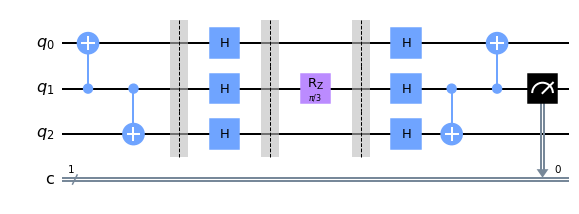

In [60]:
qc = circuitWithPhaseError()
#measure without correction
qc.measure(1,0)
qc.draw("mpl")

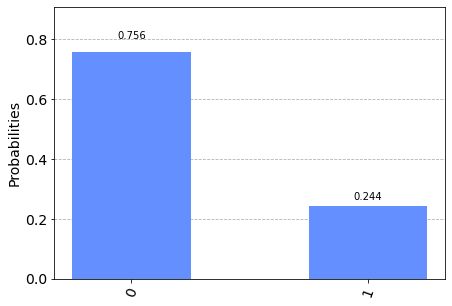

In [61]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc,backend)
result = job_sim.result()
count = result.get_counts(qc)
plot_histogram(count)

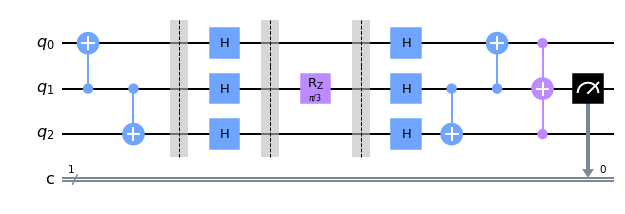

In [63]:
qc1 = circuitWithPhaseError()
qc1.ccx(0,2,1) #error correction
qc1.measure(1,0)
qc1.draw('mpl')

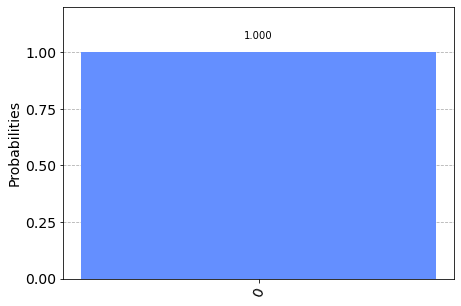

In [72]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc1,backend)
result = job_sim.result()
count = result.get_counts(qc1)
plot_histogram(count)